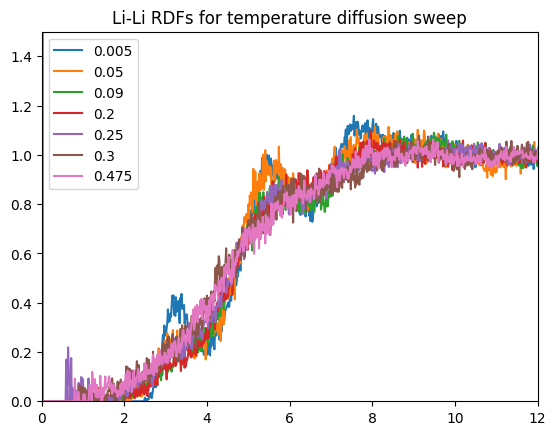

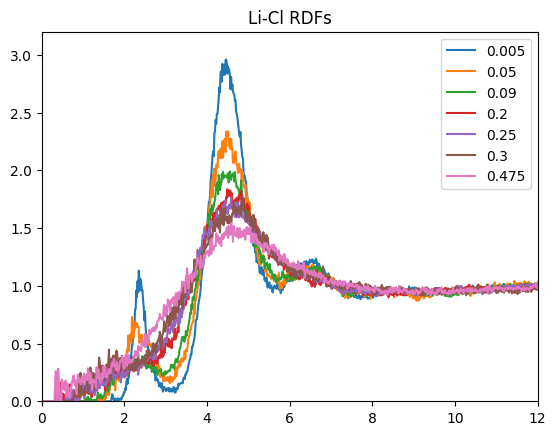

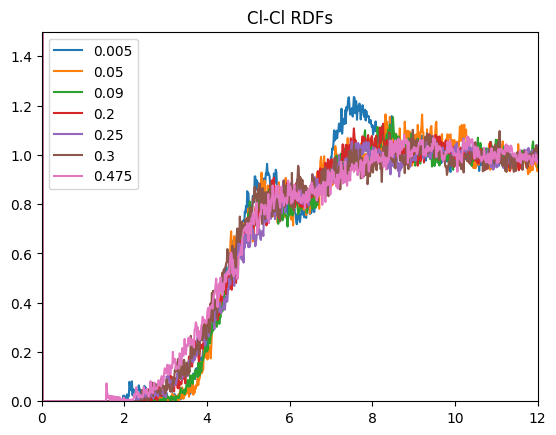

In [3]:
## plots the data on three plots, with a legend
temp_list = [290, 300, 320, 350, 390, 440, 500, 570, 650, 740, 840, 950, 1070, 1200, 1340, 1490, 1650, 1820, 2000, 2190, 2390, 2600, 2820, 3050, 3290, 3540, 3800]
disp_list = []
diff_list = [0.005, 0.05, 0.09, 0.2, 0.25, 0.3, 0.475]
long_list = disp_list.copy()
long_list.extend(diff_list)
import pickle
from matplotlib import pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rdf

import tqdm as notebook_tqdm # some notebook stuff?

def parse(in_stream, delim):
    out_arr = []
    in_arr = in_stream.split(delim)
    for str_num in in_arr:
        if len(str_num) == 0:
            continue
        out_arr.append(float(str_num))
    return out_arr

# temperature data
file_dump = open("LiCl-CG/licl-cg/rdf_dump_long.data", 'rb')
data_dump = pickle.load(file_dump)
# Li-Li plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[1].results
    plt.plot(res.bins, res.rdf)
# diffusion plot
for variance in diff_list:
    LiLi_bin = open('variances/v='+str(variance)+'/Diff_RDFs/LiLiBins', 'r')
    LiLi_res = open('variances/v='+str(variance)+'/Diff_RDFs/LiLiResults', 'r')
    LiLi_x = parse(LiLi_bin.read(), '\n')
    LiLi_y = parse(LiLi_res.read(), '\n')
    LiLi_bin.close()
    LiLi_res.close()
    plt.plot(LiLi_x, LiLi_y)
plt.xlim([0,12])
plt.ylim([0,1.5])
plt.title("Li-Li RDFs for temperature diffusion sweep")
plt.legend(long_list)
plt.savefig("LiCl-CG/licl-cg/full_temp2_Li-Li_RDF.pdf", bbox_inches='tight')
plt.show()
# Li-Cl plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[2].results
    plt.plot(res.bins, res.rdf)
# diffusion plot
for variance in diff_list:
    LiCl_bin = open('variances/v='+str(variance)+'/Diff_RDFs/LiClBins', 'r')
    LiCl_res = open('variances/v='+str(variance)+'/Diff_RDFs/LiClResults', 'r')
    LiCl_x = parse(LiCl_bin.read(), '\n')
    LiCl_y = parse(LiCl_res.read(), '\n')
    LiCl_bin.close()
    LiCl_res.close()
    plt.plot(LiCl_x, LiCl_y)
plt.xlim([0,12])
plt.ylim([0,3.2])
plt.title("Li-Cl RDFs")
plt.legend(long_list)
plt.savefig("LiCl-CG/licl-cg/full_temp2_Li-Cl_RDF.pdf", bbox_inches='tight')
plt.show()
# Cl-Cl plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[3].results
    plt.plot(res.bins, res.rdf)
# diffusion plot
for variance in diff_list:
    ClCl_bin = open('variances/v='+str(variance)+'/Diff_RDFs/ClClBins', 'r')
    ClCl_res = open('variances/v='+str(variance)+'/Diff_RDFs/ClClResults', 'r')
    ClCl_x = parse(ClCl_bin.read(), '\n')
    ClCl_y = parse(ClCl_res.read(), '\n')
    ClCl_bin.close()
    ClCl_res.close()
    plt.plot(ClCl_x, ClCl_y)
plt.xlim([0,12])
plt.ylim([0,1.5])
plt.title("Cl-Cl RDFs")
plt.legend(long_list)
plt.savefig("LiCl-CG/licl-cg/full_temp2_Cl-Cl_RDF.pdf", bbox_inches='tight')
plt.show()

file_dump.close()

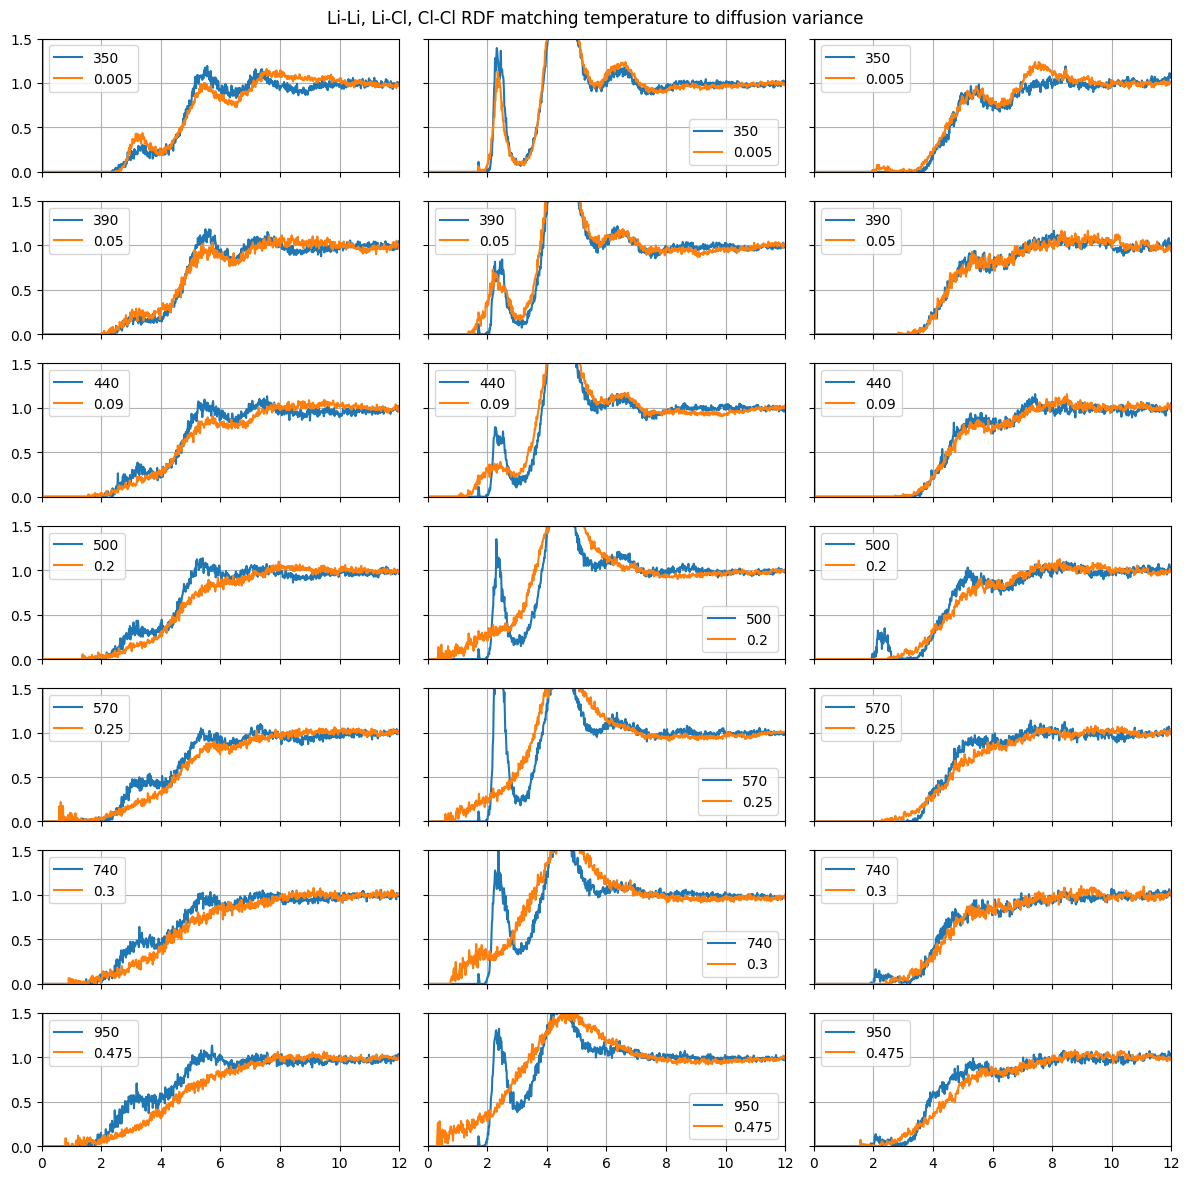

In [25]:
# plots each diffusion separately against a temperature
temp_list = [290, 300, 320, 350, 390, 440, 500, 570, 650, 740, 840, 950, 1070, 1200, 1340, 1490, 1650, 1820, 2000, 2190, 2390, 2600, 2820, 3050, 3290, 3540, 3800]
disp_list = [  350,   390,   440,   500,   570,   740,   950]
diff_list = [0.005,  0.05,  0.09,   0.2,  0.25,   0.3, 0.475]
import pickle
from matplotlib import pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rdf

import tqdm as notebook_tqdm # some notebook stuff?

def parse(in_stream, delim):
    out_arr = []
    in_arr = in_stream.split(delim)
    for str_num in in_arr:
        if len(str_num) == 0:
            continue
        out_arr.append(float(str_num))
    return out_arr

# temperature data
file_dump = open("LiCl-CG/licl-cg/rdf_dump.data", 'rb')
data_dump = pickle.load(file_dump)

N = len(disp_list)
# plots each matching separately
fig, axs = plt.subplots(N, 3, sharex=True, sharey=True)

for i in range(N):
    # Li-Li plot
    ## find the index of disp_list[i] in temp_list, then access the data and plot
    index = temp_list.index(disp_list[i])
    res = data_dump[index][1].results
    # plt.plot(res.bins, res.rdf)
    axs[i,0].plot(res.bins, res.rdf)
    # diffusion plot
    LiLi_bin = open('variances/v='+str(diff_list[i])+'/Diff_RDFs/LiLiBins', 'r')
    LiLi_res = open('variances/v='+str(diff_list[i])+'/Diff_RDFs/LiLiResults', 'r')
    LiLi_x = parse(LiLi_bin.read(), '\n')
    LiLi_y = parse(LiLi_res.read(), '\n')
    LiLi_bin.close()
    LiLi_res.close()
    # plt.plot(LiLi_x, LiLi_y)
    axs[i,0].plot(LiLi_x, LiLi_y)
    axs[i,0].set_xlim([0,12])
    axs[i,0].set_ylim([0,1.5])
    # axs[i,0].title("Li-Li RDF")
    axs[i,0].legend([disp_list[i], diff_list[i]])
    axs[i,0].grid()
    
    # Li-Cl plot
    ## find the index of disp_list[i] in temp_list, then access the data and plot
    index = temp_list.index(disp_list[i])
    res = data_dump[index][2].results
    axs[i,1].plot(res.bins, res.rdf)
    # diffusion plot
    LiCl_bin = open('variances/v='+str(diff_list[i])+'/Diff_RDFs/LiClBins', 'r')
    LiCl_res = open('variances/v='+str(diff_list[i])+'/Diff_RDFs/LiClResults', 'r')
    LiCl_x = parse(LiCl_bin.read(), '\n')
    LiCl_y = parse(LiCl_res.read(), '\n')
    LiCl_bin.close()
    LiCl_res.close()
    axs[i,1].plot(LiCl_x, LiCl_y)
    axs[i,1].set_xlim([0,12])
    axs[i,1].set_ylim([0,1.5])
    # axs[i,1].title("Li-Cl RDF")
    axs[i,1].legend([disp_list[i], diff_list[i]])
    axs[i,1].grid()
    
    # Cl-Cl plot
    ## find the index of disp_list[i] in temp_list, then access the data and plot
    index = temp_list.index(disp_list[i])
    res = data_dump[index][3].results
    axs[i,2].plot(res.bins, res.rdf)
    # diffusion plot
    ClCl_bin = open('variances/v='+str(diff_list[i])+'/Diff_RDFs/ClClBins', 'r')
    ClCl_res = open('variances/v='+str(diff_list[i])+'/Diff_RDFs/ClClResults', 'r')
    ClCl_x = parse(ClCl_bin.read(), '\n')
    ClCl_y = parse(ClCl_res.read(), '\n')
    ClCl_bin.close()
    ClCl_res.close()
    axs[i,2].plot(ClCl_x, ClCl_y)
    axs[i,2].set_xlim([0,12])
    axs[i,2].set_ylim([0,1.5])
    # axs[i,2].title("Cl-Cl RDF")
    axs[i,2].legend([disp_list[i], diff_list[i]])
    axs[i,2].grid()


fig.set_size_inches(12,12)
fig.suptitle("Li-Li, Li-Cl, Cl-Cl RDF matching temperature to diffusion variance")
fig.tight_layout()

fig.savefig("new-temp-diff-comp.pdf", dpi=2000)
fig.show()

file_dump.close()